# Title- Smart Farming: Crop Recommendation App using Machine Learning

# Objective:
Develop a predictive model that recommends the most suitable crops for cultivation based on environmental and soil parameters. The goal is to empower farmers with an intelligent decision-making tool, enhancing precision agriculture and optimizing crop yield. The model will analyze factors such as Nitrogen (N), Phosphorus (P), Potassium (K), temperature, humidity, pH, and rainfall to provide personalized crop recommendations, contributing to sustainable and efficient farming practices.

# Import Libraries:

In [1]:
# Data Handling and Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


# Miscellaneous
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
import pandas as pd
crops = pd.read_csv('Crop_recommendation.csv')
crops

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


In [3]:
crops.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crops.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana
1696,80,71,47,27.505277,80.797840,6.156373,105.077699,banana


# Data Understanding

In [5]:
crops.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


In [7]:
crops.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


In [8]:
# Display the column names
print("Column names:", crops.columns.tolist())

Column names: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [9]:
crops.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
crops.duplicated().sum()

103

In [11]:
crops.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
# Unique values in categorical column
print("Unique crops:\n", crops['label'].unique())
print()
print("Number of unique crops:", crops['label'].nunique())

Unique crops:
 ['rice' 'maize' 'Soyabeans' 'beans' 'peas' 'groundnuts' 'cowpeas' 'banana'
 'mango' 'grapes' 'watermelon' 'apple' 'orange' 'cotton' 'coffee']

Number of unique crops: 15


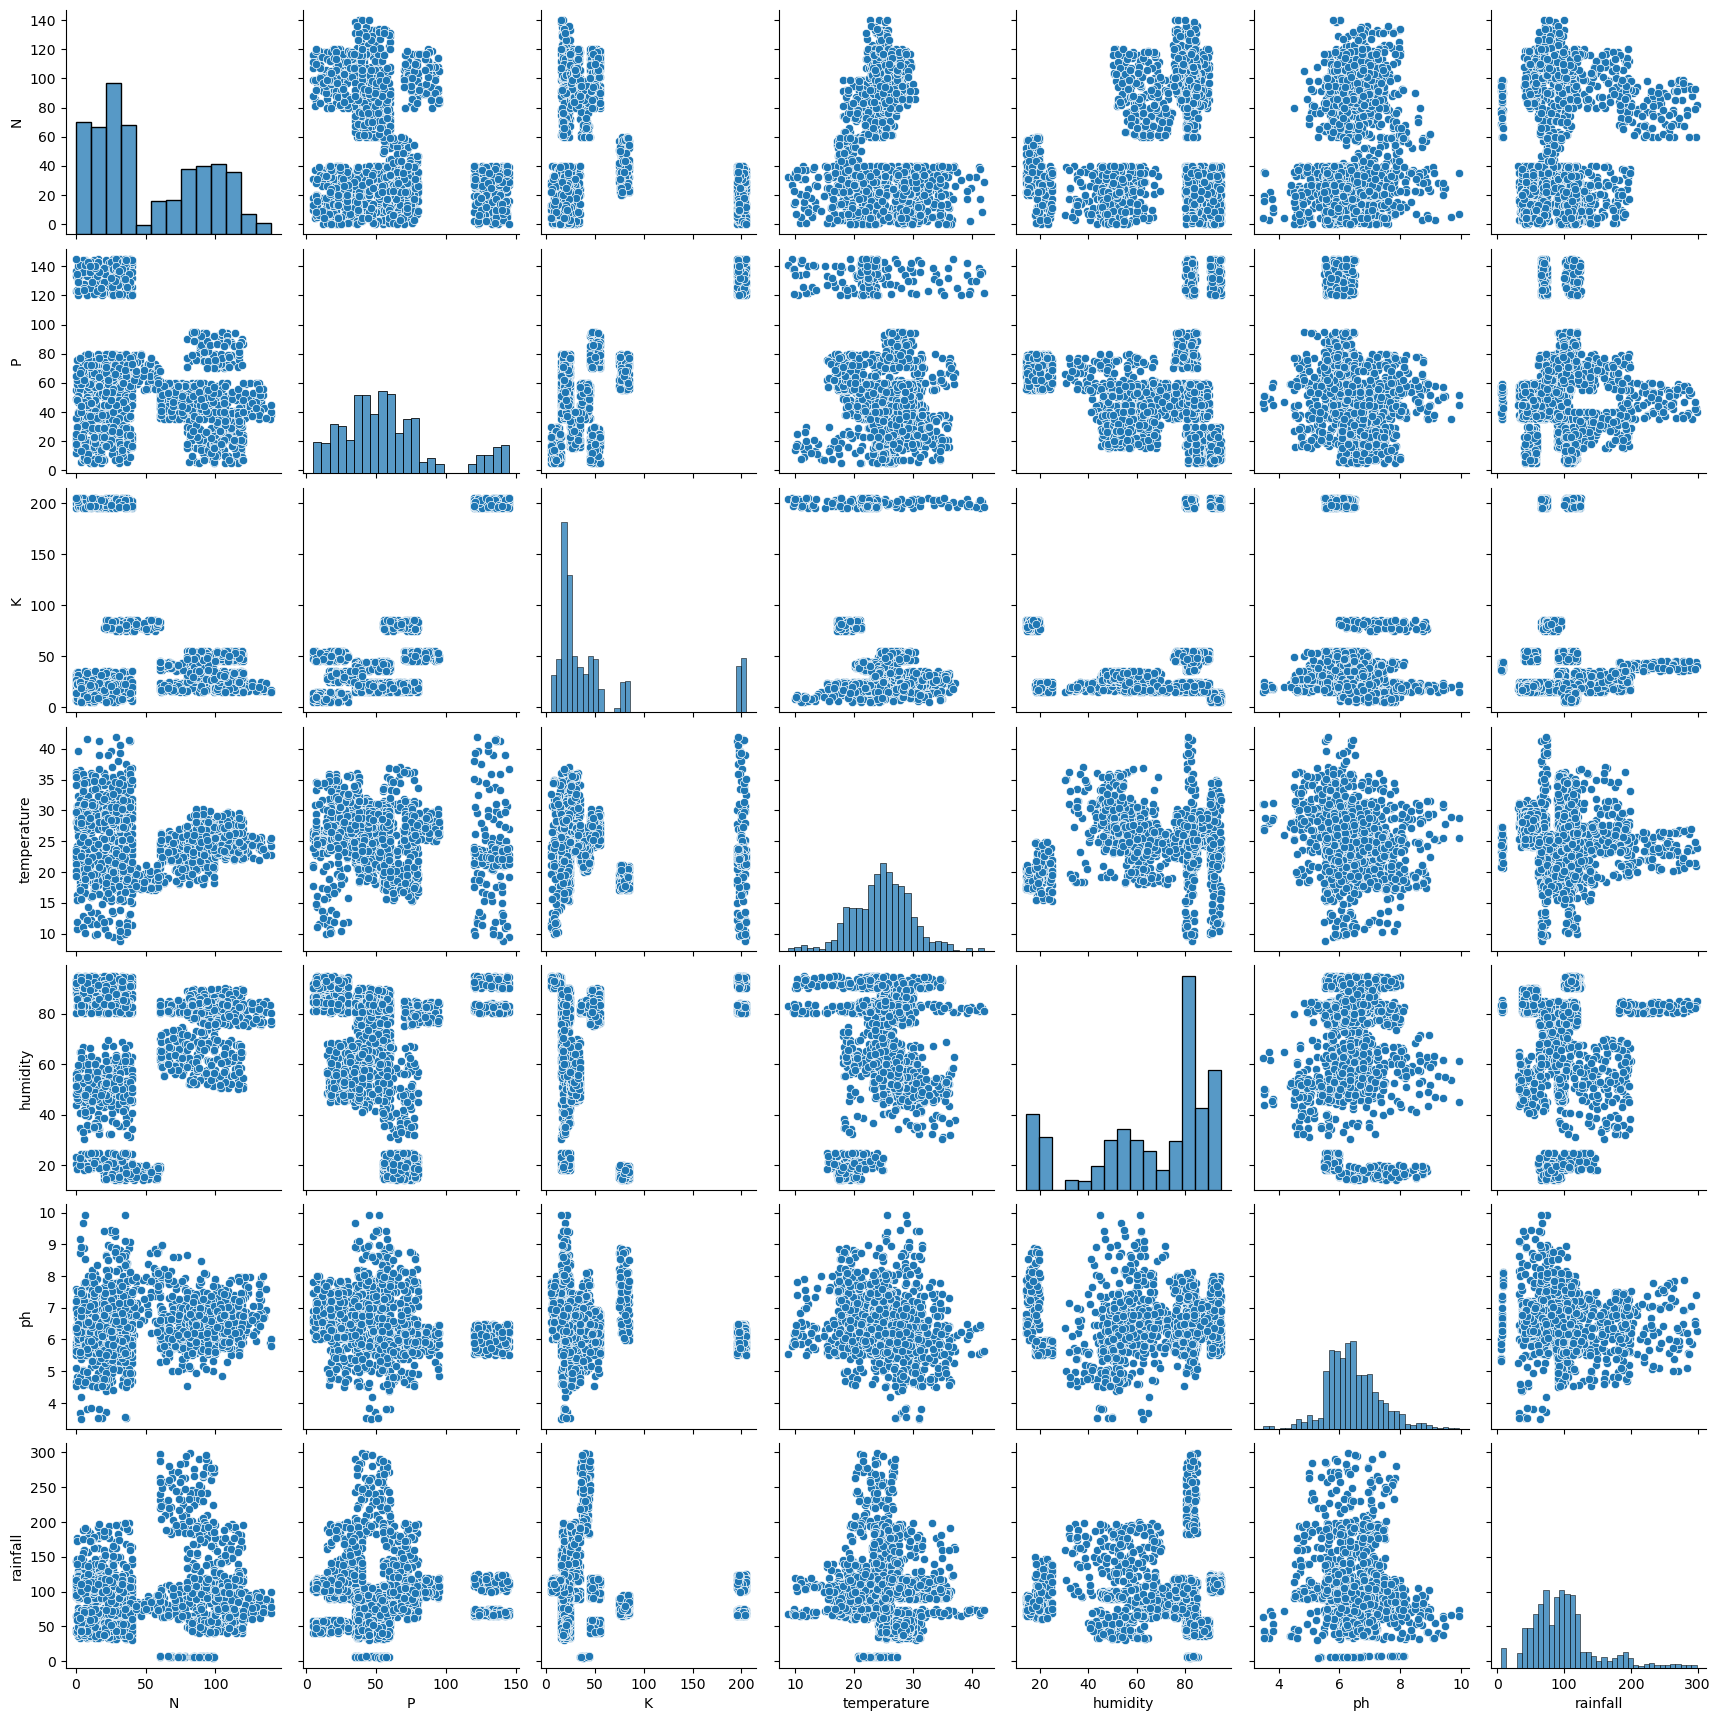

In [13]:
# Pairplot to understand the relationships
sns.pairplot(crops)
plt.show()

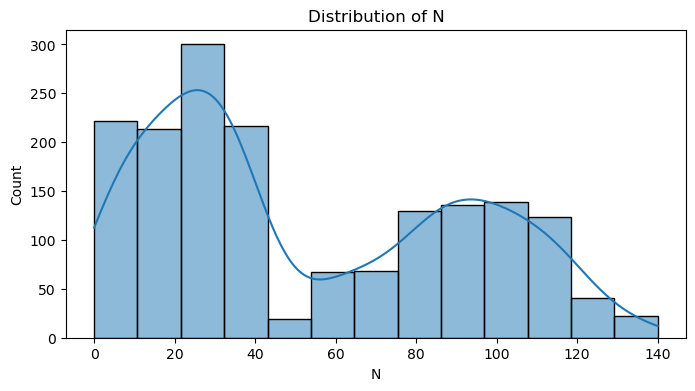

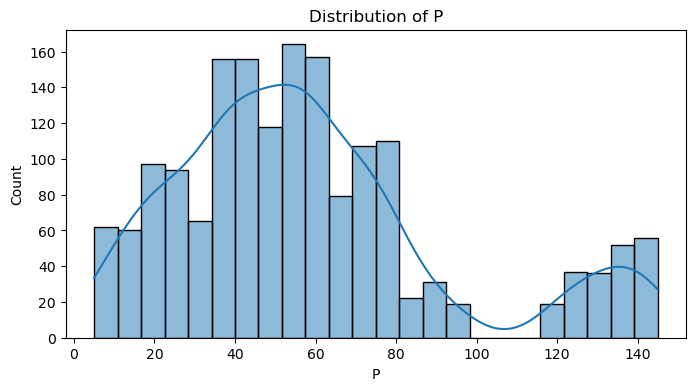

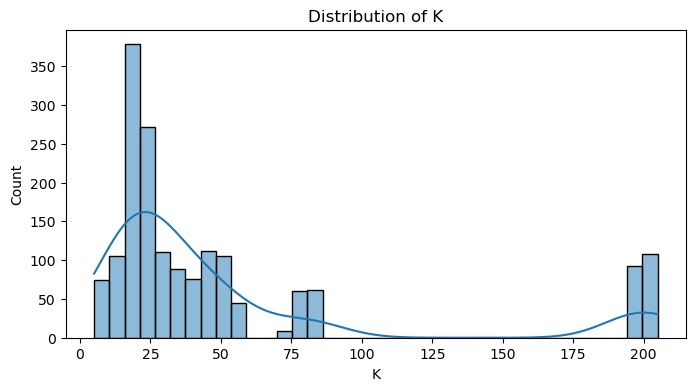

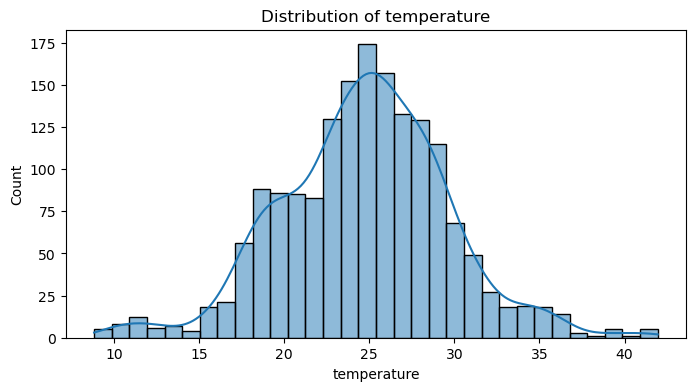

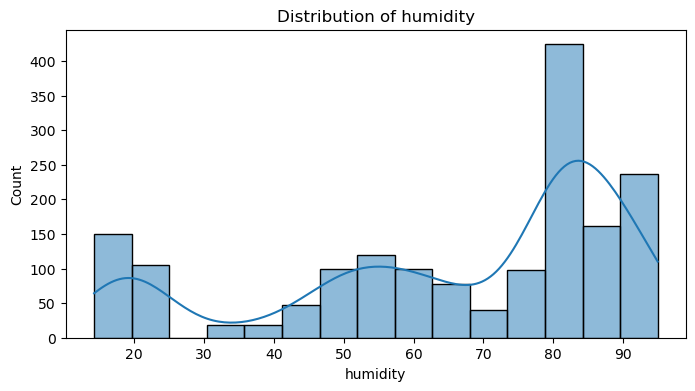

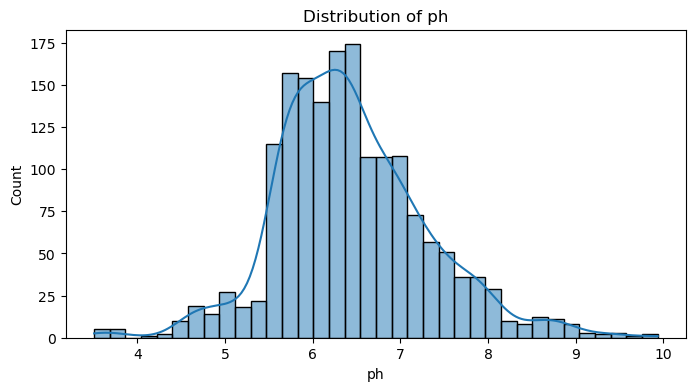

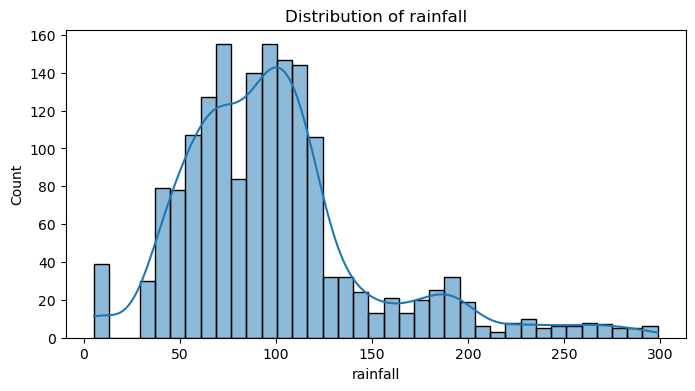

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(crops[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

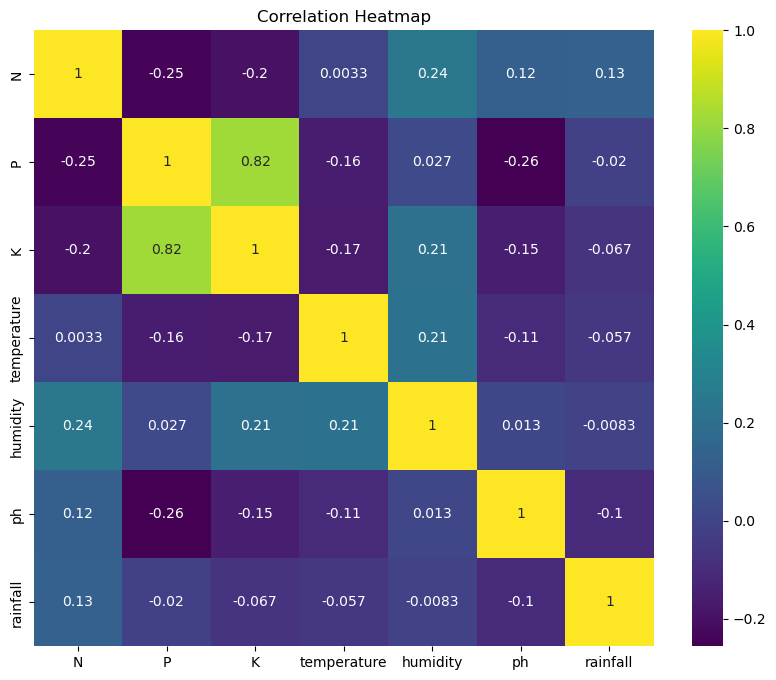

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(crops[features].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

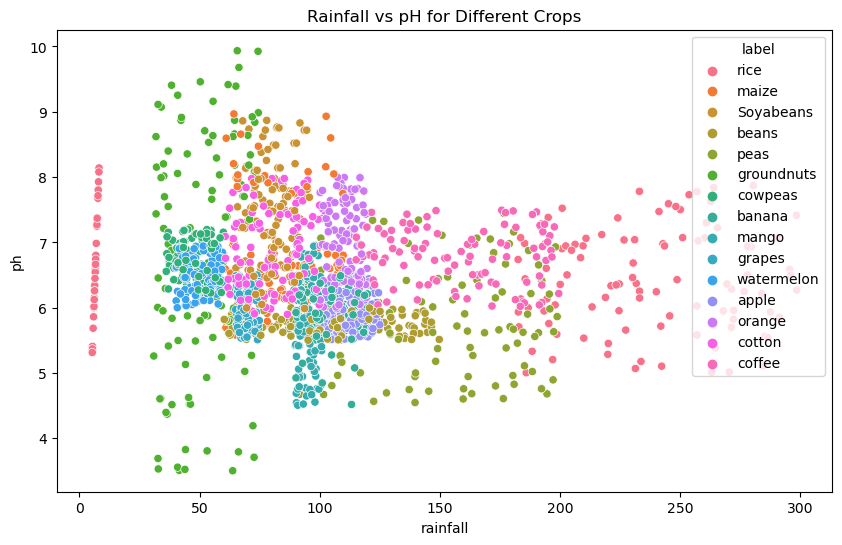

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rainfall', y='ph', hue='label', data=crops)
plt.title('Rainfall vs pH for Different Crops')
plt.show()

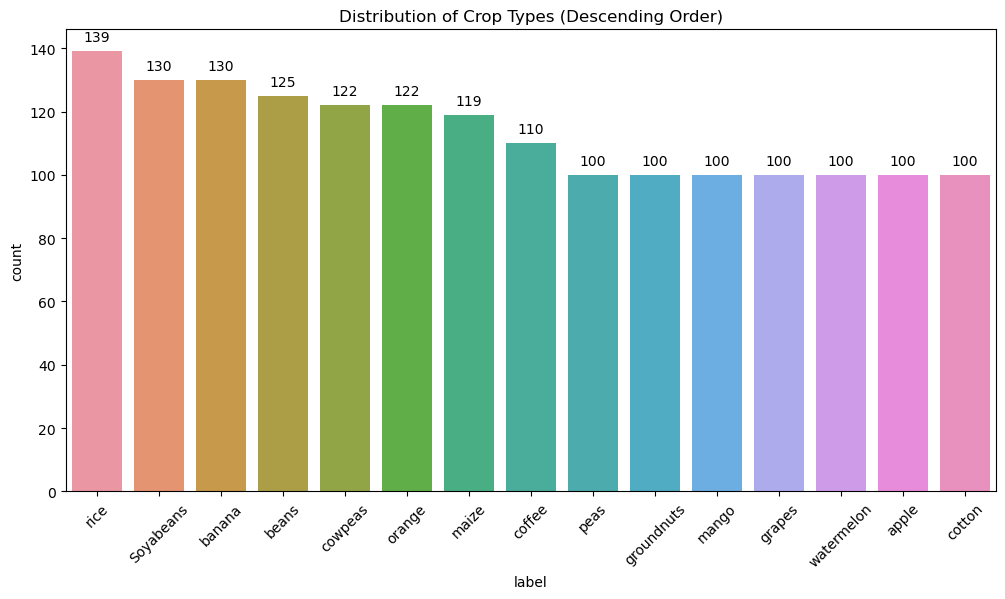

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each label in descending order
label_counts = crops['label'].value_counts().sort_values(ascending=False)

# Create a countplot with labels in descending order
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=crops, order=label_counts.index)
plt.xticks(rotation=45)
plt.title('Distribution of Crop Types (Descending Order)')

# Annotate count values on top of each bar
for p, label_count in zip(ax.patches, label_counts):
    ax.annotate(f'{label_count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Data Preprocessing 

In [18]:
# Remove duplicate rows if any
data = crops.drop_duplicates()
print("Data dimensions after removing duplicates:", data.shape)

Data dimensions after removing duplicates: (1594, 8)


In [19]:
# Renaming columns
data.rename(columns={'N': 'Nitrogen', 'P': 'Phosphorus', 'K': 'Potassium'}, inplace=True)
data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [21]:
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fitting the encoder to the 'label' column and transforming it
data['label'] = label_encoder.fit_transform(data['label'])

# Display the first few rows of the DataFrame
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,13
1,85,58,41,21.770462,80.319644,7.038096,226.655537,13
2,60,55,44,23.004459,82.320763,7.840207,263.964248,13
3,74,35,40,26.491096,80.158363,6.980401,242.864034,13
4,78,42,42,20.130175,81.604873,7.628473,262.717340,13


In [22]:
from sklearn.preprocessing import LabelEncoder

# Assuming label_encoder is the LabelEncoder used during training
label_encoder = LabelEncoder()

# Fit and transform your crop labels
crop_labels = ['rice', 'maize' ,'Soyabeans' ,'beans', 'peas', 'groundnuts', 'cowpeas' ,'banana','mango', 'grapes', 'watermelon', 'apple' ,'orange', 'cotton', 'coffee']
encoded_labels = label_encoder.fit_transform(crop_labels)

# Now you can inspect the mapping
label_mapping = dict(zip(crop_labels, encoded_labels))
print("Label Mapping:", label_mapping)

Label Mapping: {'rice': 13, 'maize': 9, 'Soyabeans': 0, 'beans': 3, 'peas': 12, 'groundnuts': 8, 'cowpeas': 6, 'banana': 2, 'mango': 10, 'grapes': 7, 'watermelon': 14, 'apple': 1, 'orange': 11, 'cotton': 5, 'coffee': 4}


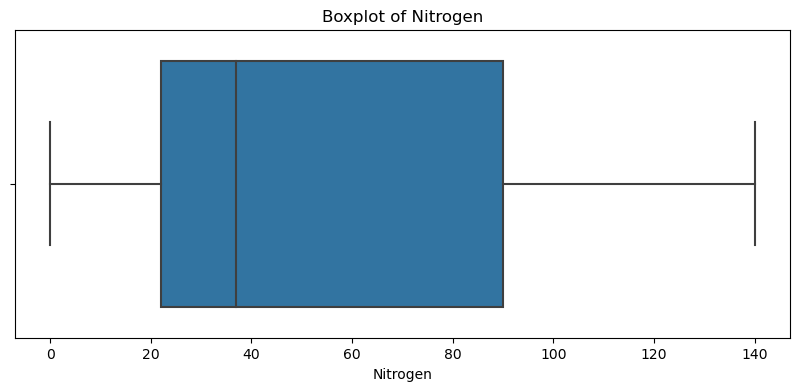

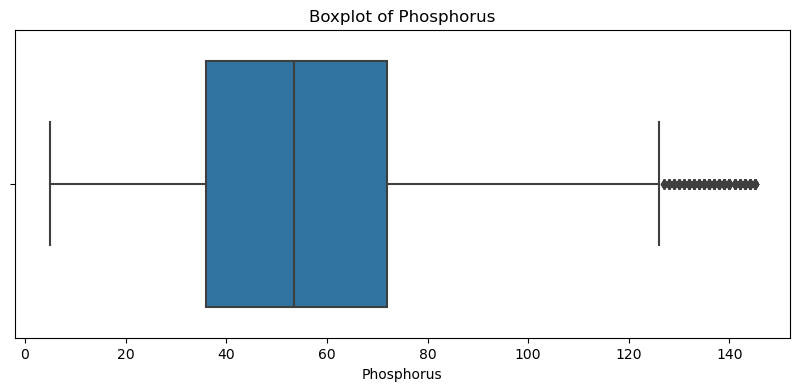

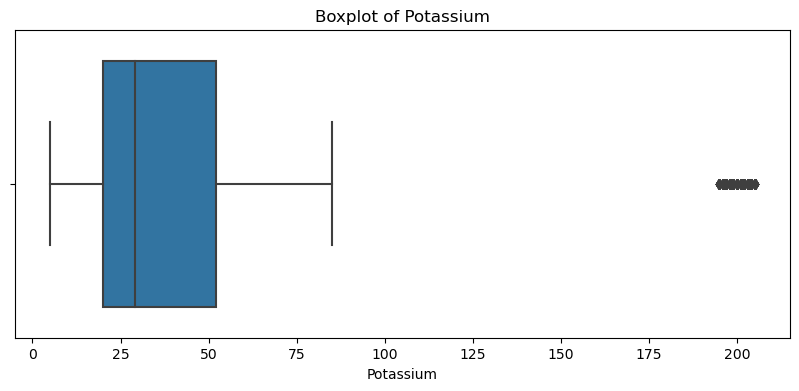

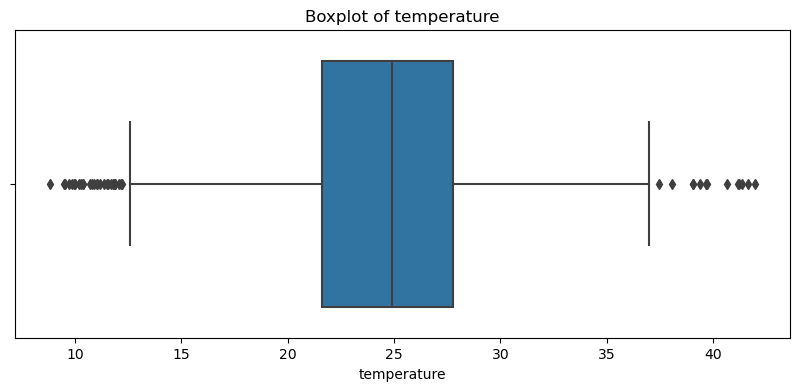

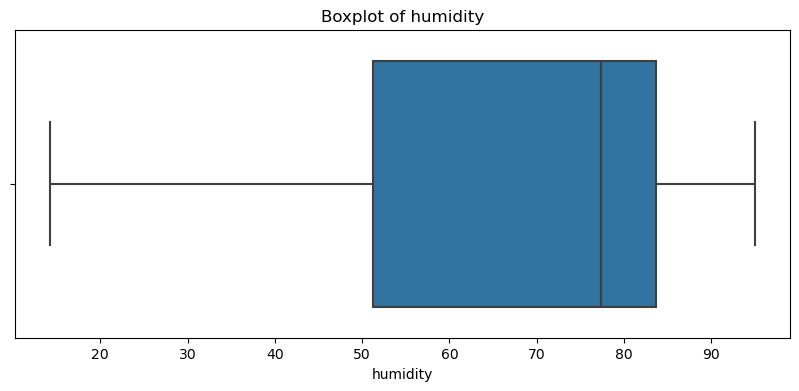

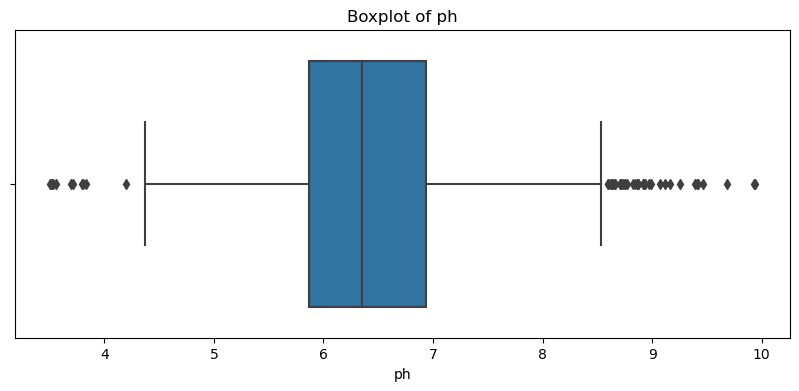

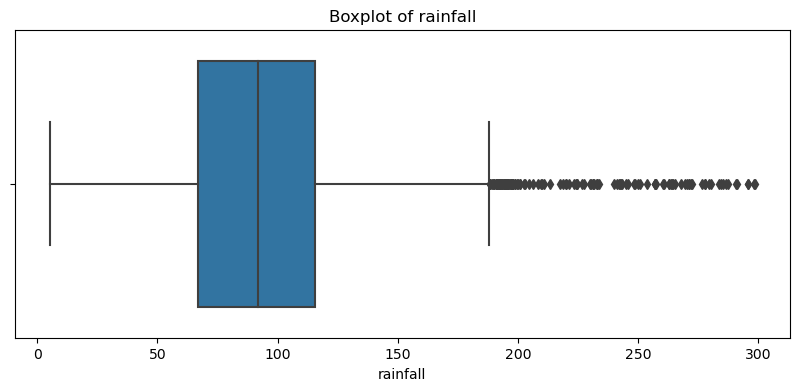

In [23]:
# Plotting boxplots
features = ['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [24]:
# Function to replace outliers with percentiles
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df.loc[df[column] < lower_limit, column] = lower_limit
    df.loc[df[column] > upper_limit, column] = upper_limit

# Applying the function
for feature in features:
    handle_outliers(data, feature)

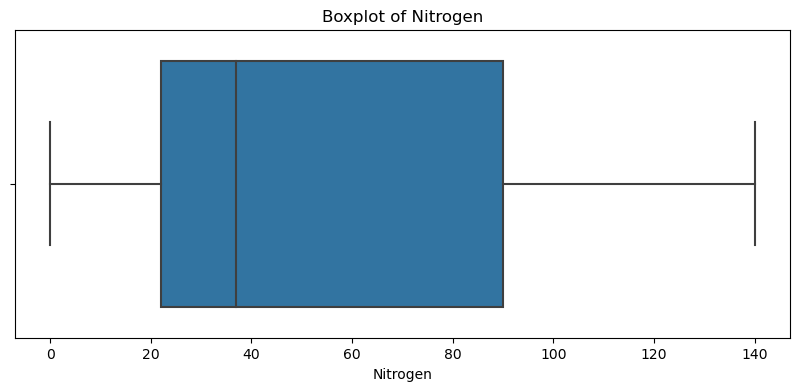

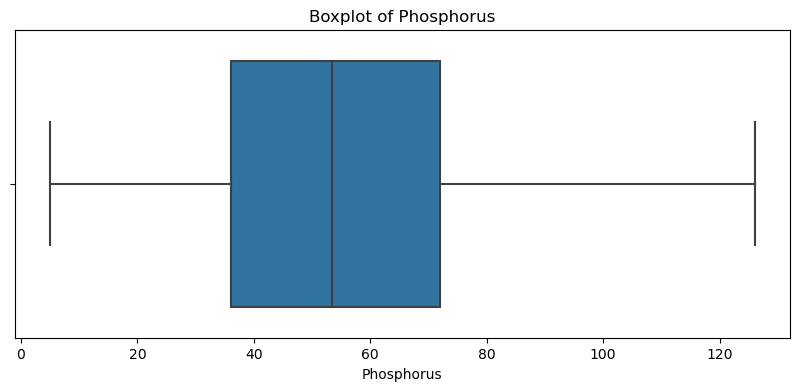

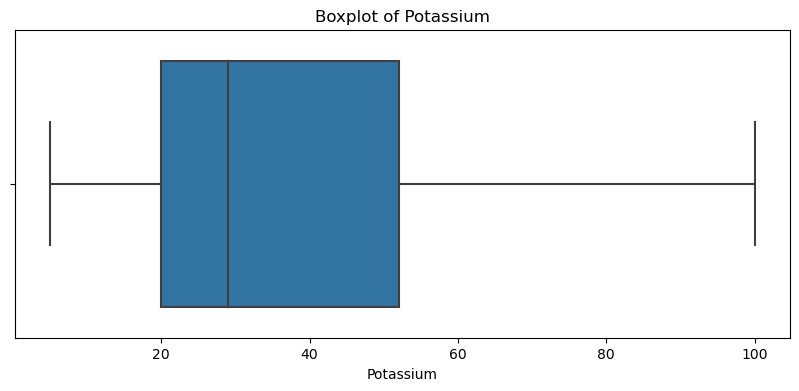

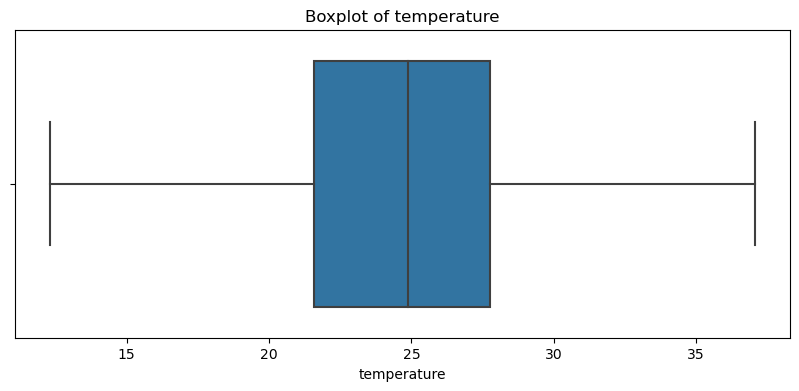

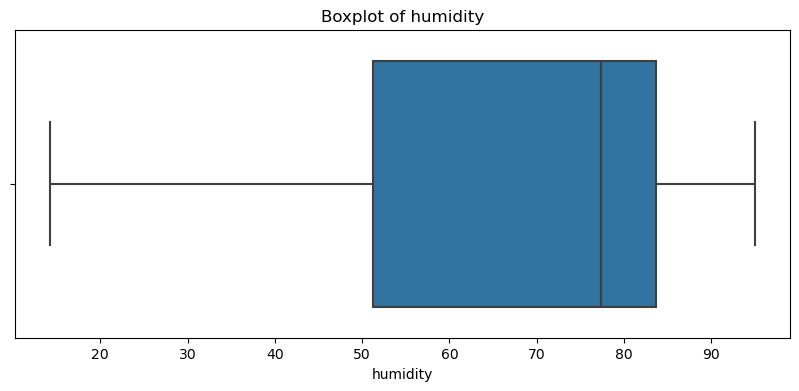

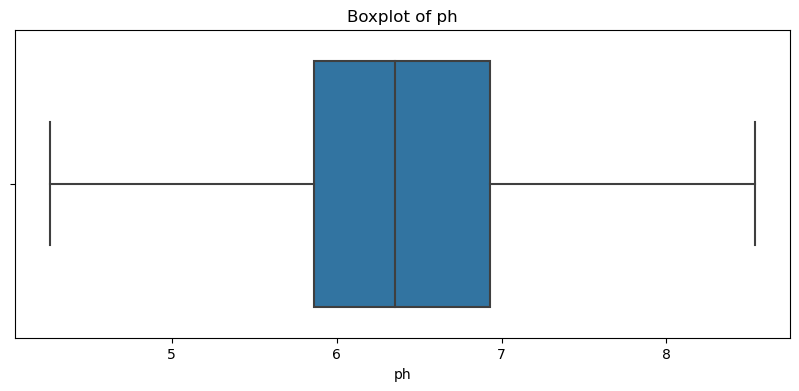

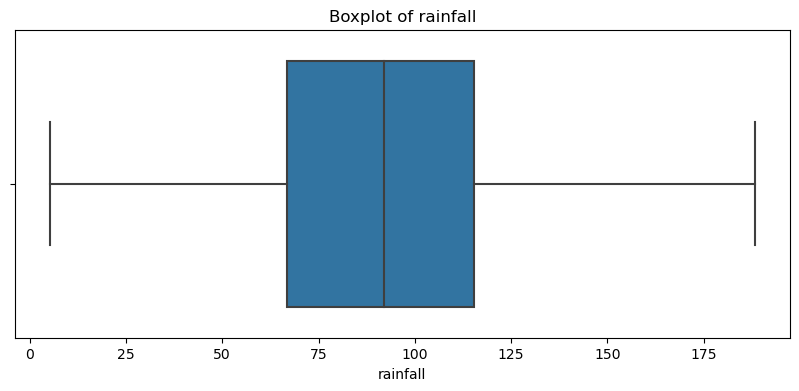

In [25]:
#after outlier imputation Plotting boxplots
features = ['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

# Data Splitting

In [26]:
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,188.194292,13
1,85,58,41,21.770462,80.319644,7.038096,188.194292,13
2,60,55,44,23.004459,82.320763,7.840207,188.194292,13
3,74,35,40,26.491096,80.158363,6.980401,188.194292,13
4,78,42,42,20.130175,81.604873,7.628473,188.194292,13


In [27]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [28]:
X.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,188.194292
1,85,58,41,21.770462,80.319644,7.038096,188.194292
2,60,55,44,23.004459,82.320763,7.840207,188.194292
3,74,35,40,26.491096,80.158363,6.980401,188.194292
4,78,42,42,20.130175,81.604873,7.628473,188.194292


In [29]:
y.head()

0    13
1    13
2    13
3    13
4    13
Name: label, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the shape of the training and testing data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1275, 7)
X_test shape: (319, 7)
y_train shape: (1275,)
y_test shape: (319,)


# Model Selection

# 1.Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.987460815047022


# 2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

Decision Tree Accuracy: 1.0


# 3. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
forest_model = RandomForestClassifier()

# Train the model
forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", accuracy_forest)

Random Forest Accuracy: 1.0


# 4. Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Accuracy:", accuracy_svm)

Support Vector Machine (SVM) Accuracy: 0.9968652037617555


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy scores from the previous step
accuracy_scores = {
    'Logistic Regression': accuracy_logistic,
    'Decision Tree': accuracy_tree,
    'Random Forest': accuracy_forest,
    'SVM': accuracy_svm
}

# Convert to a DataFrame for easy plotting
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy in descending order
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_df

,Model,Accuracy
1,Decision Tree,1.000000
2,Random Forest,1.000000
3,SVM,0.996865
0,Logistic Regression,0.987461


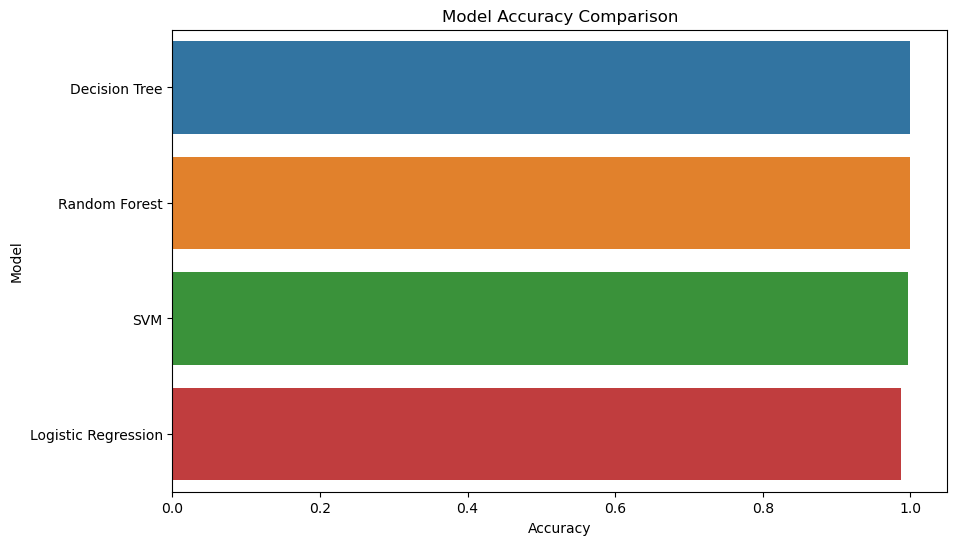

In [36]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df)

# Adding titles and labels
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')

# Show the plot
plt.show()

# Cross Validation

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(random_forest_model, X, y, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the scores
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

Cross-validation scores: [1.        0.9968652 1.        1.        1.       ]
Mean cross-validation score: 0.9993730407523511
Standard deviation of cross-validation scores: 0.001253918495297812


# Feature Importance 

In [38]:
# Fit the model on the entire dataset
random_forest_model.fit(X, y)

# Feature importance
feature_importance = random_forest_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print("Feature Importance Table:")
print(feature_importance_df)

Feature Importance Table:
       Feature  Importance
4     humidity    0.240617
2    Potassium    0.205942
6     rainfall    0.175732
1   Phosphorus    0.169431
0     Nitrogen    0.114586
3  temperature    0.058504
5           ph    0.035187


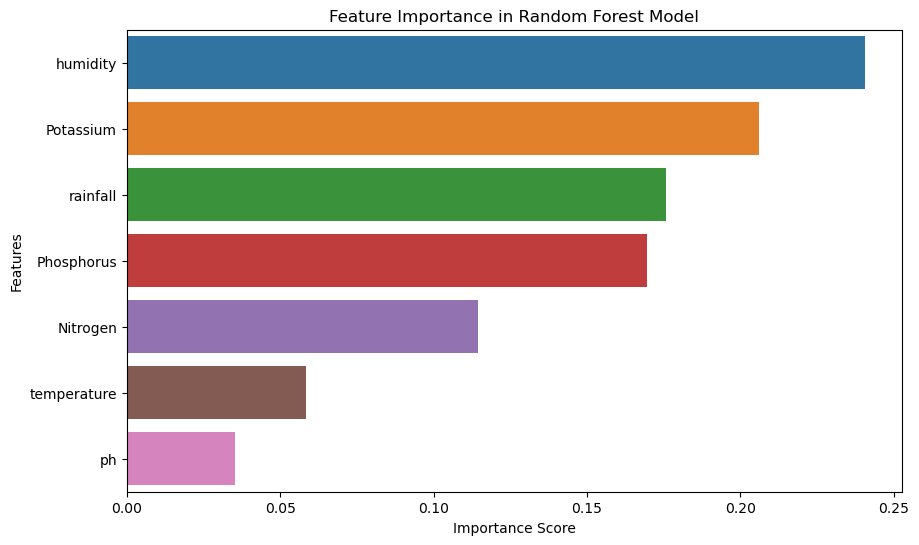

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming feature_importance_df is your DataFrame with 'Feature' and 'Importance'
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)

# Add labels and title
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')

# Show the plot
plt.show()

# Hyperparameter Tunning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 1.0


In [41]:
# Retrain the model with the best hyperparameters from Grid Search
best_grid_rf_model = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

best_grid_rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_best_grid_rf = best_grid_rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy_best_grid_rf = accuracy_score(y_test, y_pred_best_grid_rf)
print("Random Forest Accuracy (after Grid Search tuning):", accuracy_best_grid_rf)

Random Forest Accuracy (after Grid Search tuning): 1.0


# Model Saving 

In [42]:
import joblib

# Save the model to a file
joblib.dump(best_grid_rf_model, 'random_forest_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [43]:
# Load the model from the file
loaded_model = joblib.load('random_forest_model.pkl')

In [44]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

# Thank You!